# Restaurant Analysis

In [2]:
#importing required packages
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('restaurant.csv')

# EDA - Explorary Data Analysis

In [4]:
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17
...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51


In [5]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [6]:
df.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,stars,useful,funny,cool
count,1.041700e+04,10417.000000,10417.000000,10417.000000,10417.000000
mean,2.775377e+06,3.777671,1.419603,0.640875,0.759720
std,2.428654e+05,1.331451,4.875888,3.347964,4.125847
min,2.370338e+06,1.000000,0.000000,0.000000,0.000000
25%,2.566392e+06,3.000000,0.000000,0.000000,0.000000
50%,2.762536e+06,4.000000,0.000000,0.000000,0.000000
75%,2.975480e+06,5.000000,1.000000,0.000000,0.000000
max,3.220316e+06,5.000000,176.000000,159.000000,172.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [9]:
df['date']=pd.to_datetime(df['date'])

In [10]:
df = df.drop(['Unnamed: 0','business_id', 'review_id', 'user_id'], axis=1)

# Data Visualization

(<Axes: xlabel='stars', ylabel='count'>,)

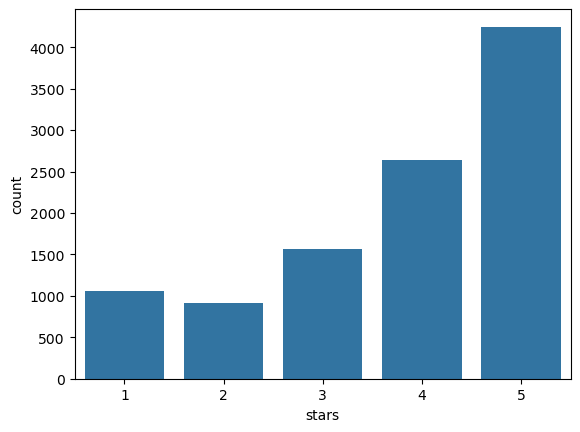

In [11]:
sns.countplot(x=df['stars']),

<Axes: xlabel='date', ylabel='Density'>

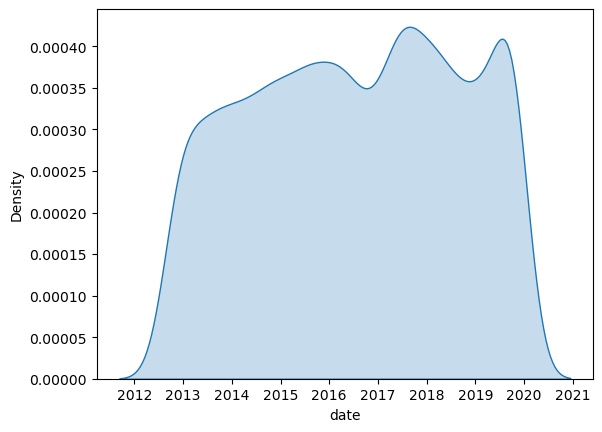

In [12]:
sns.kdeplot(x=df['date'],fill=True)

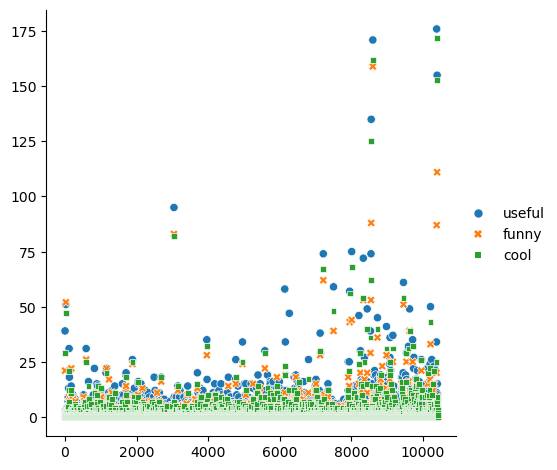

In [13]:
sns.relplot(df[['useful','funny','cool']])

In [14]:
# bu kodu yapay zeka sayesinde yazdım
# add sentiment column
df['sentiment'] = df['stars'].apply(lambda x: 'positive' if x > 3 else 'neutral' if x == 3 else 'negative')
df = df.reindex(columns=['stars','sentiment'] + [col for col in df.columns if col != 'sentiment' and col != 'stars'])
df.sentiment = df.sentiment.astype('category')

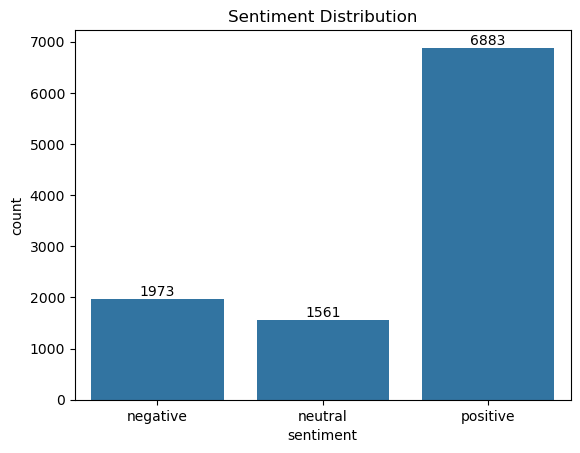

In [15]:


# Sentiment Distribution
ax = sns.countplot(x='sentiment', data=df)
ax.bar_label(ax.containers[0])
plt.title('Sentiment Distribution');



In [18]:
def wc(data, bgcolor):
    plt.figure(figsize = (10,10))
    mask = np.array(Image.open('cloud.png'))
    wc = WordCloud(background_color = bgcolor, stopwords= STOPWORDS, mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [19]:
negative_comments = df[df['sentiment'] == 'negative']['text']
positive_comments = df[df['sentiment'] == 'positive']['text']
one_star_comments = df[df['stars'] == 1]['text']
five_star_comments = df[df['stars'] == 5]['text']

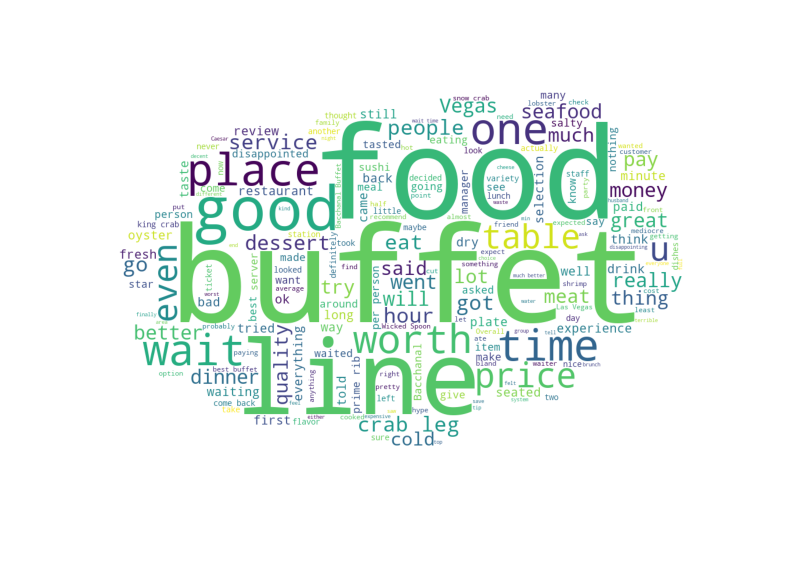

In [20]:
wc(negative_comments, 'white')

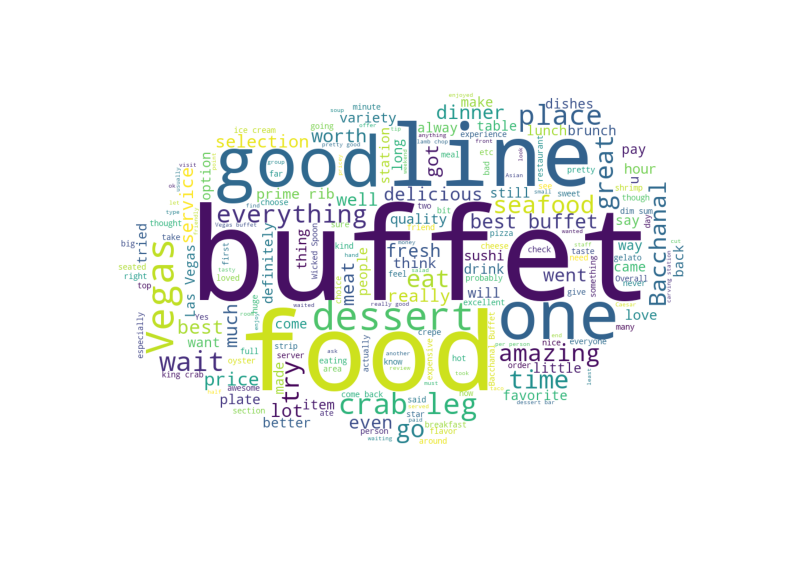

In [21]:
wc(positive_comments, 'white')

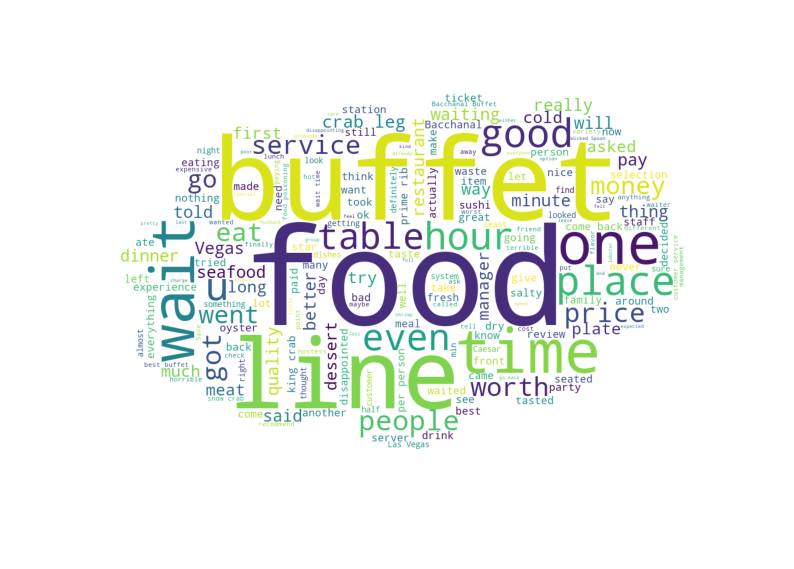

In [22]:
wc(one_star_comments, 'white')

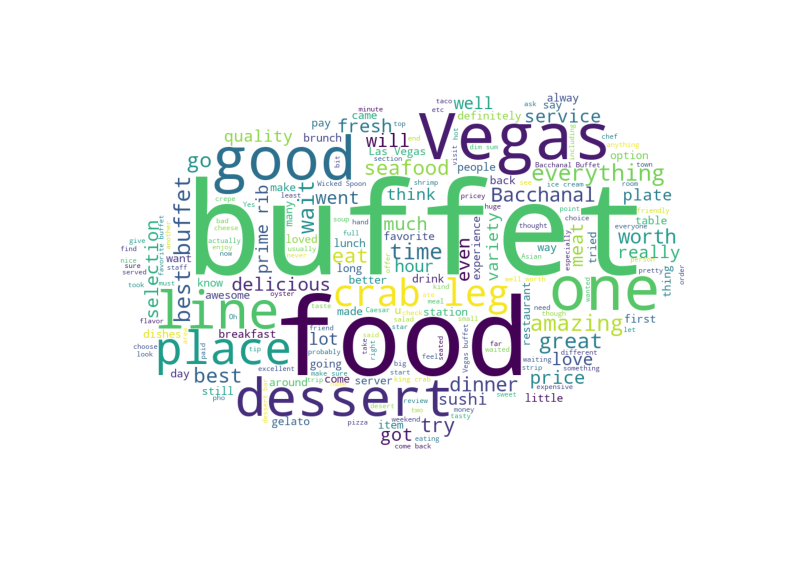

In [23]:
wc(five_star_comments, 'white')

In [24]:
df.head()

,stars,sentiment,useful,funny,cool,text,date
0,5,positive,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,4,positive,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,4,positive,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,1,negative,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,5,positive,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [26]:
df['text'].head()

0    After getting food poisoning at the Palms hote...
1    "A feast worthy of Gods"\n\nBaccarnal Buffet i...
2    The crab legs are better than the ones at Wick...
3    Not worth it! Too salty food and expensive! Th...
4    I would give this infinite stars if I could. M...
Name: text, dtype: object

In [27]:
df['text']=df['text'].str.lower()
df['text']=df['text'].str.replace('[^\w\s]','',regex=True)
df['text']=df['text'].str.replace('\d+','',regex=True)
df['text']=df['text'].str.replace('\n','',regex=True)
df['text']=df['text'].str.replace('\r','',regex=True)

In [30]:
df.columns

Index(['stars', 'sentiment', 'useful', 'funny', 'cool', 'text', 'date'], dtype='object')

In [33]:
x=df.drop(columns=['text'])
y=df['text']

In [34]:
vect = CountVectorizer()
x = df['text']
y = df['sentiment']
x = vect.fit_transform(x)
algo_test_all(x,y)

SyntaxError: incomplete input (3510224769.py, line 5)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


def algo_test_all(x,y):
        bnb=BernoulliNB()
        lr=LogisticRegression()
        dt=DecisionTreeClassifier()
        rf=RandomForestClassifier()
        gbc=GradientBoostingClassifier()
        knc=KNeighborsClassifier()
        mnb = MultinomialNB()
        ada = AdaBoostClassifier()
        

       
        
        algos=[bnb,lr,dt,rf,gbc,knc,mnb,ada]
        algo_names=['BernoulliNB','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','KNeighborsClassifier', 'MultinomialNB', 'AdaBoostClassifier']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        confusion_matrixes= []
        classification_reports= []
        accuracy_scores=[]        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            classification_reports.append(classification_report(p , y_test))
            confusion_matrixes.append(confusion_matrix(p , y_test))
            accuracy_scores.append(accuracy_score(p , y_test))

        for i in range(len(algo_names)):
            print('Algorithm:'+ '\n' , algo_names[i])
            print('Confusion Matrix:'+ '\n' , confusion_matrixes[i])
            print('Classification Report: '+ '\n' , classification_reports[i])
            print('Accuracy Score:'+ '\n' , accuracy_scores[i])
            print('************************************************************')

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

def algo_test(x, y):
    bnb = BernoulliNB()
    lr = LogisticRegression()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    gbc = GradientBoostingClassifier()
    knc = KNeighborsClassifier()
    mnb = MultinomialNB()
    ada = AdaBoostClassifier()
    
    algos = [bnb, lr, dt, rf, gbc, knc, mnb, ada]
    algo_names = ['BernoulliNB', 'LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'MultinomialNB', 'AdaBoostClassifier']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    
    best_accuracy = 0
    best_algo_index = 0
    
    for i, algo in enumerate(algos):
        p = algo.fit(x_train, y_train).predict(x_test)
        acc = accuracy_score(p, y_test)
        if acc > best_accuracy:
            best_accuracy = acc
            best_algo_index = i
    
    best_algo_name = algo_names[best_algo_index]
    best_algo = algos[best_algo_index]
    p = best_algo.fit(x_train, y_train).predict(x_test)
    
    print(f'Best Algorithm: {best_algo_name}')
    print('Confusion Matrix:\n', confusion_matrix(p, y_test))
    print('Classification Report:\n', classification_report(p, y_test))
    print('Accuracy Score:\n', accuracy_score(p, y_test))
    sns.heatmap(confusion_matrix(p, y_test), annot=True, cmap='coolwarm', fmt='d')

In [37]:
vect = CountVectorizer()
x = df['text']
y = df['sentiment']
x = vect.fit_transform(x)
algo_test_all(x,y)

Algorithm:
 BernoulliNB
Confusion Matrix:
 [[ 122   28   24]
 [  33   73  146]
 [ 234  214 1210]]
Classification Report: 
               precision    recall  f1-score   support

    negative       0.31      0.70      0.43       174
     neutral       0.23      0.29      0.26       252
    positive       0.88      0.73      0.80      1658

    accuracy                           0.67      2084
   macro avg       0.47      0.57      0.50      2084
weighted avg       0.75      0.67      0.70      2084

Accuracy Score:
 0.6741842610364683
************************************************************
Algorithm:
 LogisticRegression
Confusion Matrix:
 [[ 256   85   40]
 [  79  126   72]
 [  54  104 1268]]
Classification Report: 
               precision    recall  f1-score   support

    negative       0.66      0.67      0.66       381
     neutral       0.40      0.45      0.43       277
    positive       0.92      0.89      0.90      1426

    accuracy                           0.79      20